# Customer Churn Prediction
Project to improve some Data Science skills, namely EDA, Splits and Model Learning

**What is Customer Churn?**
Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.


**To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.**

To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few.

As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.


**Assignment / Objectives**

A sample dataset of a telecom company’s customers is provided and it's expected to done the following tasks:

> Perform exploratory analysis and extract insights from the dataset.

> Split the dataset into train/test sets and explain your reasoning.

> Build a predictive model to predict which customers are going to churn and discuss the reason why you choose a particular algorithm.

> Establish metrics to evaluate model performance.

> Discuss the potential issues with deploying the model into production.

# 0 - Pre-requisites & Environment

001.Let's start by setting up the environment and preparing to run the notebook.

Import all lybraries and dependencies for visualizations, dataframe and tests

In [23]:
import ipytest

In [24]:
%load_ext autoreload
%autoreload 2
%load_ext dotenv
%dotenv

import pandas as pd
# some settings for Data Visualization
pd.options.display.float_format='{:.4f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None) 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
plt.rcParams['figure.figsize'] = [8,8]
sns.set(style='darkgrid')

# for data treatment:
from datetime import datetime, timedelta
import missingno as msno
import numpy as np
ipytest.autoconfig(raise_on_error=True)

# for  logging and tests
import logging
import ipytest
import warnings
warnings.filterwarnings("ignore")

# for file and filesystem configuration and treatment
import sys
import json
from pathlib import Path

CODE_FOLDER = Path("code")
sys.path.extend([f"./{CODE_FOLDER}"])
print(sys.path)

DATA_FILEPATH = "WA_Fn-UseC_-Telco-Customer-Churn.csv" # <- original

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv
['C:\\Program Files\\Python310\\python310.zip', 'C:\\Program Files\\Python310\\DLLs', 'C:\\Program Files\\Python310\\lib', 'C:\\Program Files\\Python310', 'c:\\Users\\jcz\\GitHub\\ml.school\\CustomerChurn\\.venvCH', '', 'c:\\Users\\jcz\\GitHub\\ml.school\\CustomerChurn\\.venvCH\\lib\\site-packages', 'c:\\Users\\jcz\\GitHub\\ml.school\\CustomerChurn\\.venvCH\\lib\\site-packages\\win32', 'c:\\Users\\jcz\\GitHub\\ml.school\\CustomerChurn\\.venvCH\\lib\\site-packages\\win32\\lib', 'c:\\Users\\jcz\\GitHub\\ml.school\\CustomerChurn\\.venvCH\\lib\\site-packages\\Pythonwin', './code', './code']


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

# 1 - Exploratory Data Analysis

Let's run Exploratory Data Analysis on the [CustomerChurn] dataset.

Goal is to understand the data and the data and the problem we are trying to solve.

Explore the data and try to answer some questions like:

> What's the % of Churn Customers and customers that keep in with the active services?

> Is there any patterns in Churn Customers based on the gender?

> Is there any patterns/preference in Churn Customers based on the type of service provided?

> What's the most profitable service types?

> Which features and services are most profitable?

> Many more questions that will arise during the analysis

## 10.Dataset & Statistics

101.Load the dataset:

In [26]:
# import numpy as np
# import pandas as pd

pdCustomerData = pd.read_csv(DATA_FILEPATH)
pdCustomerData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,Seniority,hasPhoneService,hasMultipleLines,InternetServiceType,hasOnlineSecurity,hasOnlineBackup,hasDeviceProtection,hasTechSupport,hasStreamingTV,hasStreamingMovies,ContractFreqType,hasPaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.65,Yes


In [27]:
""" The data set includes information about:
-------------------------------------------
> Customers **who left** within the last month – the column is called Churn
> Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
> Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
> Demographic info about customers – gender, age range, and if they have partners and dependents """

102.Get the summary statistics for the features in our dataset.

In [28]:
# Dimensions of df (rows, columns)
pdCustomerData.shape

(7043, 21)

In [29]:
pdCustomerData.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,Seniority,hasPhoneService,hasMultipleLines,InternetServiceType,hasOnlineSecurity,hasOnlineBackup,hasDeviceProtection,hasTechSupport,hasStreamingTV,hasStreamingMovies,ContractFreqType,hasPaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.0000,7043,7043,7043.0000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.0000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.1621,NaN,NaN,32.3711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.7617,NaN,NaN
std,NaN,NaN,0.3686,NaN,NaN,24.5595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0900,NaN,NaN
min,NaN,NaN,0.0000,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.2500,NaN,NaN
25%,NaN,NaN,0.0000,NaN,NaN,9.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.5000,NaN,NaN
50%,NaN,NaN,0.0000,NaN,NaN,29.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.3500,NaN,NaN
75%,NaN,NaN,0.0000,NaN,NaN,55.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.8500,NaN,NaN


In [30]:
# Data datatypes + info - could use `pdCustomerData.dtypes`, but `info()` is more descriptive
pdCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           7043 non-null   object 
 1   gender               7043 non-null   object 
 2   SeniorCitizen        7043 non-null   int64  
 3   Partner              7043 non-null   object 
 4   Dependents           7043 non-null   object 
 5   Seniority            7043 non-null   int64  
 6   hasPhoneService      7043 non-null   object 
 7   hasMultipleLines     7043 non-null   object 
 8   InternetServiceType  7043 non-null   object 
 9   hasOnlineSecurity    7043 non-null   object 
 10  hasOnlineBackup      7043 non-null   object 
 11  hasDeviceProtection  7043 non-null   object 
 12  hasTechSupport       7043 non-null   object 
 13  hasStreamingTV       7043 non-null   object 
 14  hasStreamingMovies   7043 non-null   object 
 15  ContractFreqType     7043 non-null   o

In [31]:
pdCustomerData.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Seniority', 'hasPhoneService', 'hasMultipleLines',
       'InternetServiceType', 'hasOnlineSecurity', 'hasOnlineBackup',
       'hasDeviceProtection', 'hasTechSupport', 'hasStreamingTV',
       'hasStreamingMovies', 'ContractFreqType', 'hasPaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype=object)

In [32]:
pdCustomerData.dtypes

customerID              object
gender                  object
SeniorCitizen            int64
Partner                 object
Dependents              object
Seniority                int64
hasPhoneService         object
hasMultipleLines        object
InternetServiceType     object
hasOnlineSecurity       object
hasOnlineBackup         object
hasDeviceProtection     object
hasTechSupport          object
hasStreamingTV          object
hasStreamingMovies      object
ContractFreqType        object
hasPaperlessBilling     object
PaymentMethod           object
MonthlyCharges         float64
TotalCharges            object
Churn                   object
dtype: object

103.Display the **Distribution** of values for **Categorical columns** in our data:

In [33]:
distribution_gender              = pdCustomerData["gender"].value_counts()
distribution_SeniorCitizen       = pdCustomerData["SeniorCitizen"].value_counts()
distribution_Partner             = pdCustomerData["Partner"].value_counts()
distribution_Dependents          = pdCustomerData["Dependents"].value_counts()
distribution_hasPhoneService     = pdCustomerData["hasPhoneService"].value_counts()
distribution_hasMultipleLines    = pdCustomerData["hasMultipleLines"].value_counts()
distribution_InternetServiceType = pdCustomerData["InternetServiceType"].value_counts()
distribution_hasOnlineSecurity   = pdCustomerData["hasOnlineSecurity"].value_counts()
distribution_hasOnlineBackup     = pdCustomerData["hasOnlineBackup"].value_counts()
distribution_hasDeviceProtection = pdCustomerData["hasDeviceProtection"].value_counts()
distribution_hasTechSupport      = pdCustomerData["hasTechSupport"].value_counts()
distribution_hasStreamingTV      = pdCustomerData["hasStreamingTV"].value_counts()
distribution_hasStreamingMovies  = pdCustomerData["hasStreamingMovies"].value_counts()
distribution_ContractFreqType    = pdCustomerData["ContractFreqType"].value_counts()
distribution_hasPaperlessBilling = pdCustomerData["hasPaperlessBilling"].value_counts()
distribution_PaymentMethod       = pdCustomerData["PaymentMethod"].value_counts()


print(distribution_gender,              end="\n\n")
print(distribution_SeniorCitizen,       end="\n\n")
print(distribution_Partner,             end="\n\n")
print(distribution_Dependents,          end="\n\n")
print(distribution_hasPhoneService,     end="\n\n")
print(distribution_hasMultipleLines,    end="\n\n")
print(distribution_InternetServiceType, end="\n\n")
print(distribution_hasOnlineSecurity,   end="\n\n")
print(distribution_hasOnlineBackup,     end="\n\n")
print(distribution_hasDeviceProtection, end="\n\n")
print(distribution_hasTechSupport,      end="\n\n")
print(distribution_hasStreamingTV,      end="\n\n")
print(distribution_hasStreamingMovies,  end="\n\n")
print(distribution_ContractFreqType,    end="\n\n")
print(distribution_hasPaperlessBilling, end="\n\n")
print(distribution_PaymentMethod)

gender
Male      3555
Female    3488
Name: count, dtype: int64

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

hasPhoneService
Yes    6361
No      682
Name: count, dtype: int64

hasMultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetServiceType
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

hasOnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

hasOnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

hasDeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

hasTechSupport
No                     3473
Yes                    2044
No 

## 11. Data Completeness & Uniqueness

111.Check for any **Missing Values** in the dataset.

<Axes: >

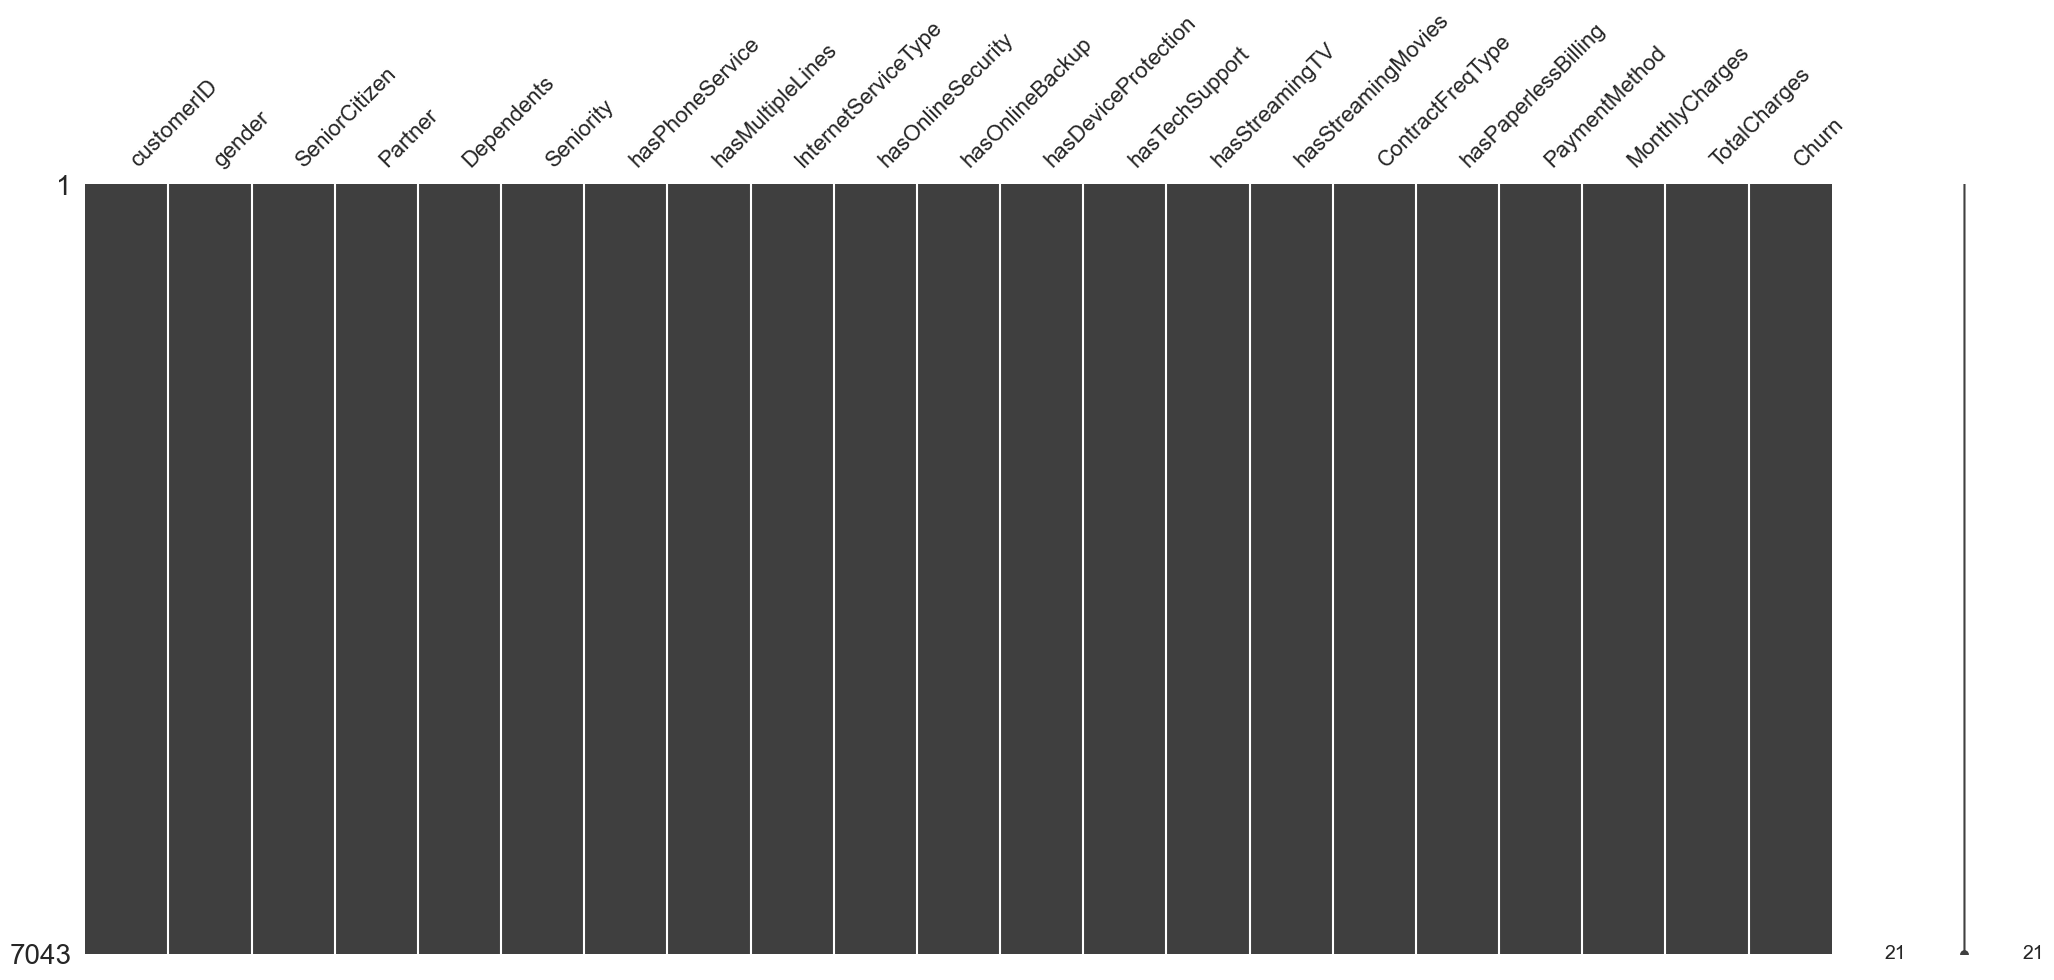

In [34]:
# Visualize missing values as a matrix
msno.matrix(pdCustomerData)

In [35]:
""" Using this matrix we can very quickly find the pattern of missingness in the dataset.

> From the above visualisation we can observe that it has no peculiar pattern that stands out.
> In fact there is no obvious missing data.
  (however we should be alert to check for columns that will need to convert, as empties might be reinterpreted) """

In [36]:
pdCustomerData.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
Seniority              0
hasPhoneService        0
hasMultipleLines       0
InternetServiceType    0
hasOnlineSecurity      0
hasOnlineBackup        0
hasDeviceProtection    0
hasTechSupport         0
hasStreamingTV         0
hasStreamingMovies     0
ContractFreqType       0
hasPaperlessBilling    0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

In [37]:
# df = pdCustomerData
# df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
# df.isnull().sum()

In [38]:
# Calculating the Missing Values % contribution in DF
df_null = pdCustomerData.isna().mean().round(4)*100

df_null.sort_values(ascending=False)

customerID            0.0000
hasDeviceProtection   0.0000
TotalCharges          0.0000
MonthlyCharges        0.0000
PaymentMethod         0.0000
hasPaperlessBilling   0.0000
ContractFreqType      0.0000
hasStreamingMovies    0.0000
hasStreamingTV        0.0000
hasTechSupport        0.0000
hasOnlineBackup       0.0000
gender                0.0000
hasOnlineSecurity     0.0000
InternetServiceType   0.0000
hasMultipleLines      0.0000
hasPhoneService       0.0000
Seniority             0.0000
Dependents            0.0000
Partner               0.0000
SeniorCitizen         0.0000
Churn                 0.0000
dtype: float64

In [39]:
# Just for missing values due to combined criteria the cases that had Cars available:
pdCustomerData[pdCustomerData['gender'] != 'Male'].isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
Seniority              0
hasPhoneService        0
hasMultipleLines       0
InternetServiceType    0
hasOnlineSecurity      0
hasOnlineBackup        0
hasDeviceProtection    0
hasTechSupport         0
hasStreamingTV         0
hasStreamingMovies     0
ContractFreqType       0
hasPaperlessBilling    0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

111.1. If it makes sense, get rid of the missing values. Possible strategies:

    i. replace by most common value
    ii. remove sample row from input dataset
    iii. remove column (if indeed there are so many missing it doesn't make sense to consider feature)
    iv. replace by least common value
    v. replace by mean

In [40]:
# # example with i.: most frequent
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy="most_frequent")
# pdCustomerData.iloc[:, :] = imputer.fit_transform(pdCustomerData)

# # Let's display again the number of missing values:
# pdCustomerData.isna().sum()

112.Check for duplicates in the dataset.

In [41]:
# check if any duplicates record exists (for complete row duplicate use `sum(pdCustomerData.duplicated()) == 0`)
key2CheckDUPs = ["customerID"] # in this case there is no combined key, otherwise would use ["keyCol1","keyCol2"]
if (sum(pdCustomerData.duplicated(subset = key2CheckDUPs)) == 0):
      print(f"No Duplicates for key {key2CheckDUPs}.")
else: print(pdCustomerData[pdCustomerData.duplicated(subset=key2CheckDUPs, keep=False)].drop_duplicates())

No Duplicates for key ['customerID'].


## 12.Data Manipulation

In [155]:
pdCustomerData = pdCustomerData.drop(['customerID'], axis = 1)
pdCustomerData.head()

,gender,SeniorCitizen,Partner,Dependents,Seniority,hasPhoneService,hasMultipleLines,InternetServiceType,hasOnlineSecurity,hasOnlineBackup,hasDeviceProtection,hasTechSupport,hasStreamingTV,hasStreamingMovies,ContractFreqType,hasPaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.8500,29.8500,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.9500,1889.5000,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.8500,108.1500,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.3000,1840.7500,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.7000,151.6500,1


### 121. Treat Numeric/decimal fields

121.1 Convert to Numeric what was interpreted as a variant object

In [42]:
# first convert the float columns to numeric, ignore (null) errors:
pdCustomerData['MonthlyCharges'] = pd.to_numeric(pdCustomerData.MonthlyCharges, errors='coerce')
pdCustomerData['TotalCharges'] = pd.to_numeric(pdCustomerData.TotalCharges, errors='coerce')
pdCustomerData.isnull().sum()

customerID              0
gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
Seniority               0
hasPhoneService         0
hasMultipleLines        0
InternetServiceType     0
hasOnlineSecurity       0
hasOnlineBackup         0
hasDeviceProtection     0
hasTechSupport          0
hasStreamingTV          0
hasStreamingMovies      0
ContractFreqType        0
hasPaperlessBilling     0
PaymentMethod           0
MonthlyCharges          0
TotalCharges           11
Churn                   0
dtype: int64

In [43]:
pdCustomerData[np.isnan(pdCustomerData['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,Seniority,hasPhoneService,hasMultipleLines,InternetServiceType,hasOnlineSecurity,hasOnlineBackup,hasDeviceProtection,hasTechSupport,hasStreamingTV,hasStreamingMovies,ContractFreqType,hasPaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.5500,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.2500,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.8500,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.7500,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.0500,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.8500,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.3500,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.0000,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.7000,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.3500,NaN,No


In [44]:
""" It can also be noted that the Seniority column is 0 for these entries even though the MonthlyCharges
  column is not empty.
> Let's see if there are any other 0 values in the tenure column. """

121.2 Treat Seniority Inconsistency

In [45]:
pdCustomerData[pdCustomerData['Seniority'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [46]:
""" There are no additional missing values in the Seniority column.
> Let's delete the rows with missing values in Seniority columns since there are only 11 rows
  and deleting them will not affect the data. """

In [47]:
pdCustomerData.drop(labels=pdCustomerData[pdCustomerData['Seniority'] == 0].index, axis=0, inplace=True)
pdCustomerData[pdCustomerData['Seniority'] == 0].index

Index([], dtype='int64')

121.3 Treat TotalCharges Inconsistency

To solve the problem of missing values in TotalCharges column, I decided to fill it with the mean of TotalCharges values.

In [48]:
pdCustomerData[np.isnan(pdCustomerData['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,Seniority,hasPhoneService,hasMultipleLines,InternetServiceType,hasOnlineSecurity,hasOnlineBackup,hasDeviceProtection,hasTechSupport,hasStreamingTV,hasStreamingMovies,ContractFreqType,hasPaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [49]:
# if after removing the samples with invalid Seniority there are still missing TotalCharges:
pdCustomerData.fillna(pdCustomerData["TotalCharges"].mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,Seniority,hasPhoneService,hasMultipleLines,InternetServiceType,hasOnlineSecurity,hasOnlineBackup,hasDeviceProtection,hasTechSupport,hasStreamingTV,hasStreamingMovies,ContractFreqType,hasPaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.7500,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.6500,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.8000,1990.5000,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2000,7362.9000,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.6000,346.4500,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.4000,306.6000,Yes


In [50]:
pdCustomerData.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
Seniority              0
hasPhoneService        0
hasMultipleLines       0
InternetServiceType    0
hasOnlineSecurity      0
hasOnlineBackup        0
hasDeviceProtection    0
hasTechSupport         0
hasStreamingTV         0
hasStreamingMovies     0
ContractFreqType       0
hasPaperlessBilling    0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

### 122.Treat the Datetime fields

122.1 Convert from String to Datetime

In [51]:
import re
# Define the regex pattern to match and capture day, month, year, hour, minute and seconds components
dttPattern = r'(\d{1,2})[-/](\d{1,2})[-/](\d{4}) (\d{1,2}):(\d{1,2}):(\d{1,2})'

# Function to pad single-digit numbers with a leading zero
def pad_with_zero(match):
    return match.group(1).zfill(2) + '-' + match.group(2).zfill(2) + '-' + match.group(3) + ' ' + match.group(4).zfill(2) + ':' + match.group(5).zfill(2) + ':' + match.group(6).zfill(2)

# Function to preprocess datetime strings and ensure consistent formatting
def preprocess_datetime(datetime_str):
    return re.sub(dttPattern, pad_with_zero, datetime_str+":00" if datetime_str.count(':')==1 else datetime_str) # to cope with seconds

In [52]:
# pdCustomerData['RequestTimestamp'] = pdCustomerData['RequestTimestamp'].astype(str)
# pdCustomerData['RequestTimestamp'] = pdCustomerData['RequestTimestamp'].apply(preprocess_datetime)
# pdCustomerData['RequestTimestamp'] = pd.to_datetime(pdCustomerData['RequestTimestamp'], format="%d-%m-%Y %H:%M:%S")
# #pdCustomerData.head()

In [53]:
# pdCustomerData['DropTimestamp'] = pdCustomerData['DropTimestamp'].astype(str)
# pdCustomerData['DropTimestamp'] = pdCustomerData['DropTimestamp'].apply(preprocess_datetime)
# pdCustomerData['DropTimestamp'] = pd.to_datetime(pdCustomerData['DropTimestamp'], format="%d-%m-%Y %H:%M:%S")
# pdCustomerData.head()

121.2 Extract the Day, WeekDay and Hour from the Request Timestamp

In [54]:
# # Extract the day from request timestamp
# RequestDay = pdCustomerData['RequestTimestamp'].dt.day
# RequestDay.value_counts()
# pdCustomerData['RequestDay'] = RequestDay
# #pdCustomerData.head()

In [55]:
# # Extract the day from request timestamp
# RequestWeekDay = (pdCustomerData['RequestTimestamp'].dt.dayofweek + 2) % 7
# RequestWeekDay.value_counts()
# pdCustomerData['RequestWeekDay'] = RequestWeekDay
# #pdCustomerData.head()

In [56]:
# # Extract the hour from the request timestamp
# RequestHour = pdCustomerData['RequestTimestamp'].dt.hour
# RequestHour.value_counts()
# pdCustomerData['RequestHour'] = RequestHour
# pdCustomerData.head()

In [57]:
pdCustomerData["SeniorCitizen"]= pdCustomerData["SeniorCitizen"].map({0: "No", 1: "Yes"})
pdCustomerData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,Seniority,hasPhoneService,hasMultipleLines,InternetServiceType,hasOnlineSecurity,hasOnlineBackup,hasDeviceProtection,hasTechSupport,hasStreamingTV,hasStreamingMovies,ContractFreqType,hasPaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.7500,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.6500,Yes


In [58]:
pdCustomerData["InternetServiceType"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetServiceType, dtype: object

In [59]:
numerical_cols = ['Seniority', 'MonthlyCharges', 'TotalCharges']
pdCustomerData[numerical_cols].describe()

,Seniority,MonthlyCharges,TotalCharges
count,7032.0000,7032.0000,7032.0000
mean,32.4218,64.7982,2283.3004
std,24.5453,30.0860,2266.7714
min,1.0000,18.2500,18.8000
25%,9.0000,35.5875,401.4500
50%,29.0000,70.3500,1397.4750
75%,55.0000,89.8625,3794.7375
max,72.0000,118.7500,8684.8000


## 13.Data Visualizations

### 131.Daily Plot by Hour

131.1. Gender & Churn Distribution

In [60]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=pdCustomerData['gender'].value_counts(), name="Gender"), 1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=pdCustomerData['Churn'].value_counts(), name="Churn"), 1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [61]:
""" 26.6 % of customers switched to another firm.
 >  Customers are 49.5 % female and 50.5 % male. """

In [64]:
pdCustomerData["Churn"][pdCustomerData["Churn"]=="No"].groupby(by=pdCustomerData["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [66]:
pdCustomerData["Churn"][pdCustomerData["Churn"]=="Yes"].groupby(by=pdCustomerData["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

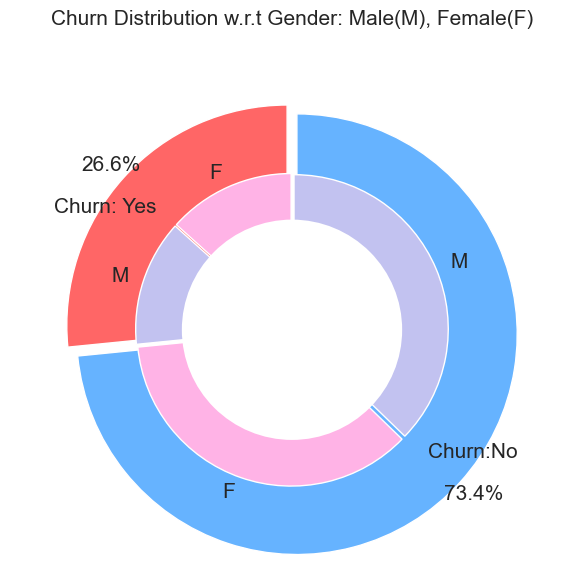

In [68]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#ffb3e6','#c2c2f0','#ffb3e6', '#c2c2f0']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

In [70]:
""" There is negligible difference in customer percentage/ count who chnaged the service provider.
  > Both genders behaved in similar fashion when it comes to migrating to another service provider/firm. """

In [73]:
fig = px.histogram(pdCustomerData, x="Churn", color="ContractFreqType", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [74]:
""" About 75% of customer with Month-to-Month Contract opted to move out as compared to 
    13% of customrs with One Year Contract and 3% with Two Year Contract """

In [75]:
fig = px.histogram(pdCustomerData, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [76]:
""" Major customers who moved out were having Electronic Check as Payment Method.
    Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer
    and Mailed Check as Payment Method were less likely to move out. """

In [79]:
pdCustomerData["InternetServiceType"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [81]:
pdCustomerData[pdCustomerData["gender"]=="Male"][["InternetServiceType", "Churn"]].value_counts()

InternetServiceType  Churn
DSL                  No       992
Fiber optic          No       910
No                   No       717
Fiber optic          Yes      633
DSL                  Yes      240
No                   Yes       57
Name: count, dtype: int64

In [83]:
pdCustomerData[pdCustomerData["gender"]=="Female"][["InternetServiceType", "Churn"]].value_counts()

InternetServiceType  Churn
DSL                  No       965
Fiber optic          No       889
No                   No       690
Fiber optic          Yes      664
DSL                  Yes      219
No                   Yes       56
Name: count, dtype: int64

In [ ]:
# Factor plot of hour and day with respect to Status
sns.catplot(x = 'RequestHour', hue = 'Status', row = 'RequestDay', data = pdCustomerData, kind='count', height=5, aspect=3)

In [84]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

133.1. Display the **Covariance** matrix of the dataset.

The "covariance" measures how changes in one variable are associated with changes in a second variable. In other words, the covariance measures the degree to which two variables are linearly associated.

In [112]:
pdCustomerData.cov(numeric_only=True)

,Seniority,MonthlyCharges,TotalCharges
Seniority,602.4698,182.2995,45950.7432
MonthlyCharges,182.2995,905.1658,44401.3331
TotalCharges,45950.7432,44401.3331,5138252.4071


133.2. Interpreting the covariance matrix:

1. The positive covariance of xx.xx between VarX and VarY length suggests...
2. The positive covariance of zz.zz between VarX and VarY length suggests...
3. The negative covariance of yy.yy between VarX and VarY length suggests...

In [85]:
""" A lot of customers choose the Fiber optic service and it's also evident that the 
    customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
    Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service. """

In [87]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(pdCustomerData, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [88]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(pdCustomerData, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [89]:
""" Customers that doesn't have partners are more likely to churn """

In [91]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(pdCustomerData, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [92]:
""" It can be observed that the fraction of senior citizen is very less.
    Most of the senior citizens churn. """

In [94]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(pdCustomerData, x="Churn", color="hasOnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [95]:
""" Most customers churn in the absence of online security """

In [96]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(pdCustomerData, x="Churn", color="hasPaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [97]:
""" Customers with Paperless Billing are most likely to churn. """

In [98]:
fig = px.histogram(pdCustomerData, x="Churn", color="hasTechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [99]:
""" Customers with no TechSupport are most likely to migrate to another service provider. """

In [100]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(pdCustomerData, x="Churn", color="hasPhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [101]:
""" Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn. """

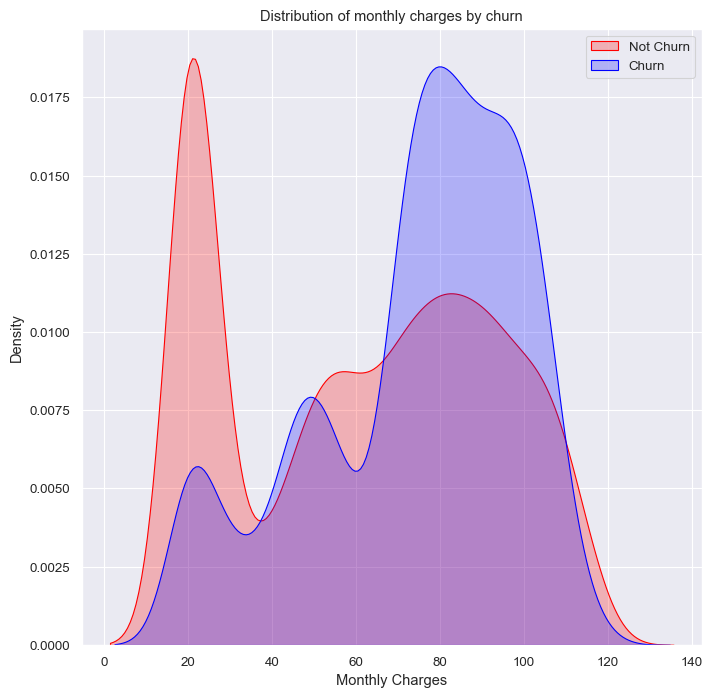

In [102]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(pdCustomerData.MonthlyCharges[(pdCustomerData["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(pdCustomerData.MonthlyCharges[(pdCustomerData["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

In [103]:
""" Customers with higher Monthly Charges are also more likely to churn """

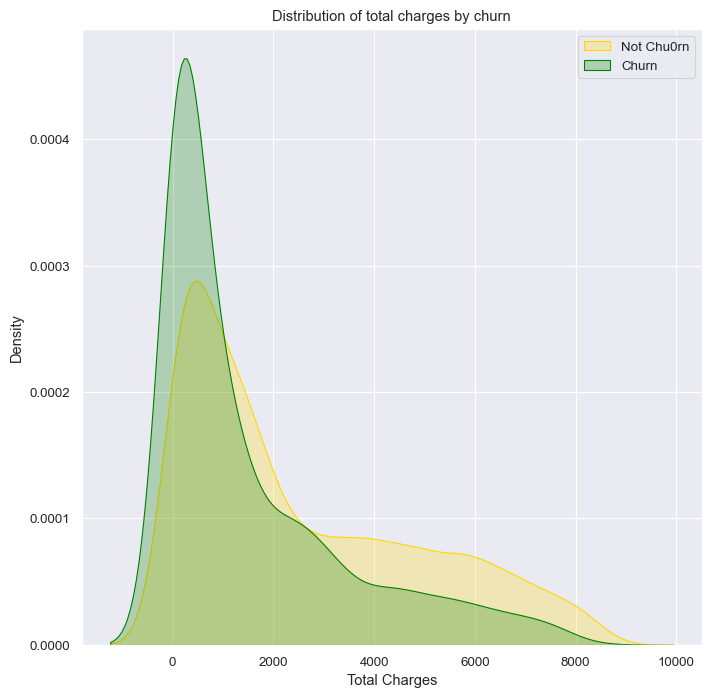

In [104]:
ax = sns.kdeplot(pdCustomerData.TotalCharges[(pdCustomerData["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(pdCustomerData.TotalCharges[(pdCustomerData["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [108]:
fig = px.box(pdCustomerData, x='Churn', y = 'Seniority')

# Update yaxis properties
fig.update_yaxes(title_text='Seniority (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Seniority vs Churn</b>',
)

fig.show()

In [109]:
""" New customers are more likely to churn """

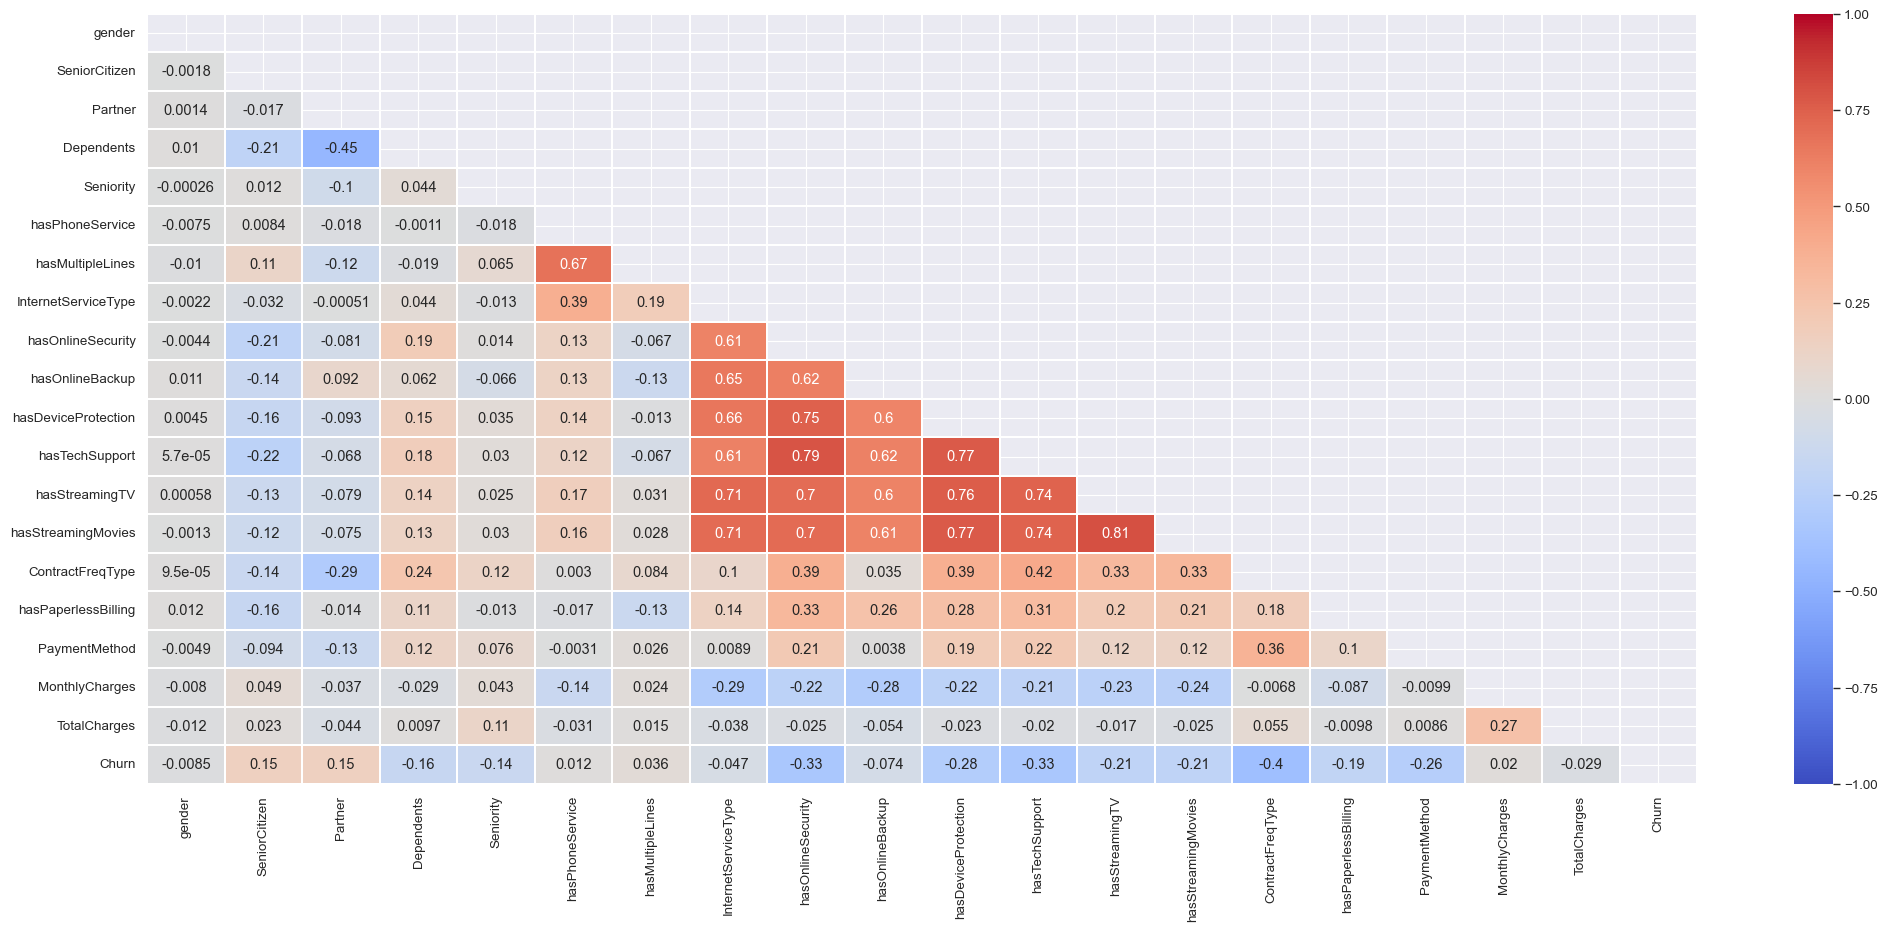

In [156]:
plt.figure(figsize=(25, 10))

corr = pdCustomerData.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

## 14. Data Pre-processing

141.Splitting the data into train and test sets

In [113]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [114]:
pdCustomerData = pdCustomerData.apply(lambda x: object_to_int(x))
pdCustomerData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,Seniority,hasPhoneService,hasMultipleLines,InternetServiceType,hasOnlineSecurity,hasOnlineBackup,hasDeviceProtection,hasTechSupport,hasStreamingTV,hasStreamingMovies,ContractFreqType,hasPaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.8500,29.8500,0
1,3953,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.9500,1889.5000,0
2,2558,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.8500,108.1500,1
3,5524,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.3000,1840.7500,0
4,6500,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.7000,151.6500,1


In [115]:
plt.figure(figsize=(14,7))
pdCustomerData.corr()['Churn'].sort_values(ascending = False)

Churn                  1.0000
MonthlyCharges         0.1929
hasPaperlessBilling    0.1915
SeniorCitizen          0.1505
PaymentMethod          0.1079
hasMultipleLines       0.0380
hasPhoneService        0.0117
gender                -0.0085
customerID            -0.0179
hasStreamingTV        -0.0363
hasStreamingMovies    -0.0388
InternetServiceType   -0.0471
Partner               -0.1500
Dependents            -0.1631
hasDeviceProtection   -0.1779
hasOnlineBackup       -0.1953
TotalCharges          -0.1995
hasTechSupport        -0.2822
hasOnlineSecurity     -0.2891
Seniority             -0.3540
ContractFreqType      -0.3961
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [116]:
X = pdCustomerData.drop(columns = ['Churn'])
y = pdCustomerData['Churn'].values

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [118]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

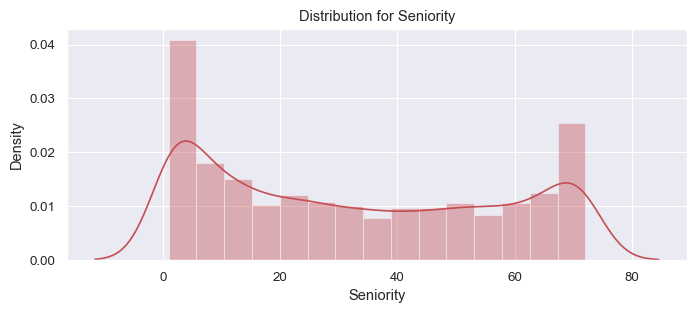

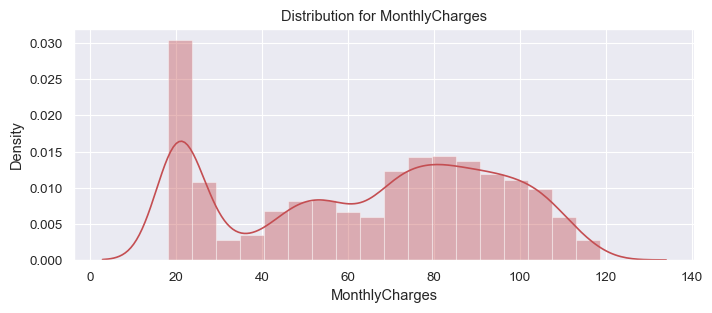

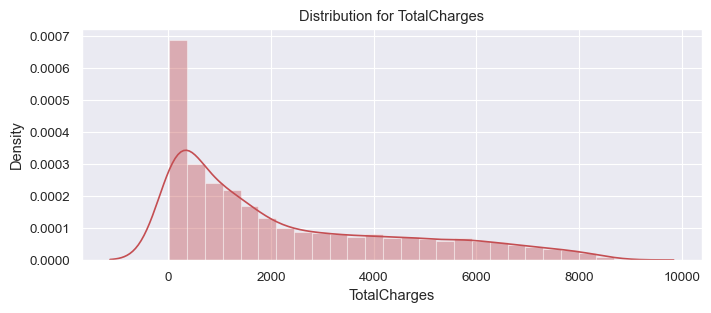

In [120]:
num_cols = ["Seniority", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, pdCustomerData)

In [121]:
""" Since the numerical features are distributed over different value ranges,
    I will use standard scalar to scale them down to the same range. """

122.Standardizing numeric attributes

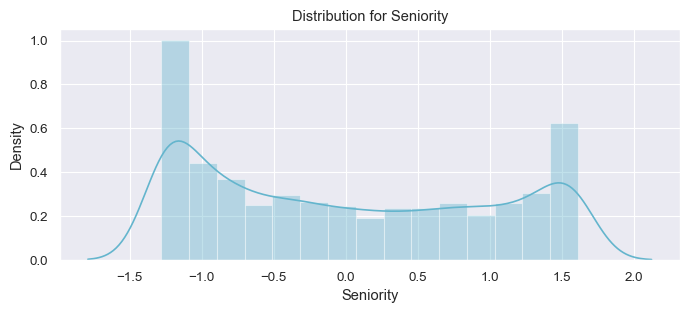

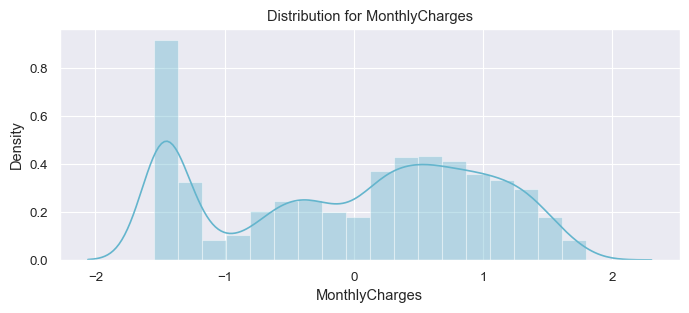

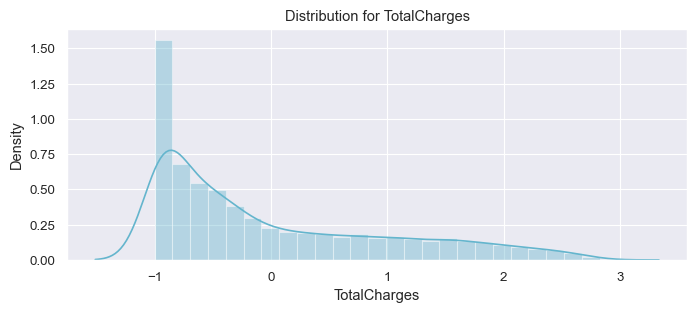

In [123]:
df_std = pd.DataFrame(StandardScaler().fit_transform(pdCustomerData[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [124]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [125]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# 3.Machine Learning Model Evaluations and Predictions
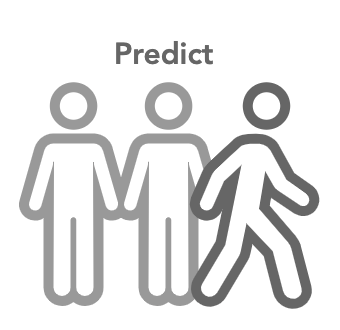

## 31. KNN

In [126]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.723696682464455


In [127]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.74      0.96      0.84      1549
           1       0.39      0.07      0.12       561

    accuracy                           0.72      2110
   macro avg       0.56      0.51      0.48      2110
weighted avg       0.65      0.72      0.64      2110



## 32. SVC

In [128]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7341232227488151


In [129]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



## 33. Random Forest

In [135]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "sqrt",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8099526066350711


In [136]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1549
           1       0.71      0.49      0.58       561

    accuracy                           0.81      2110
   macro avg       0.77      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



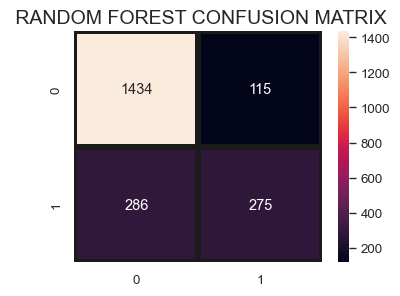

In [137]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

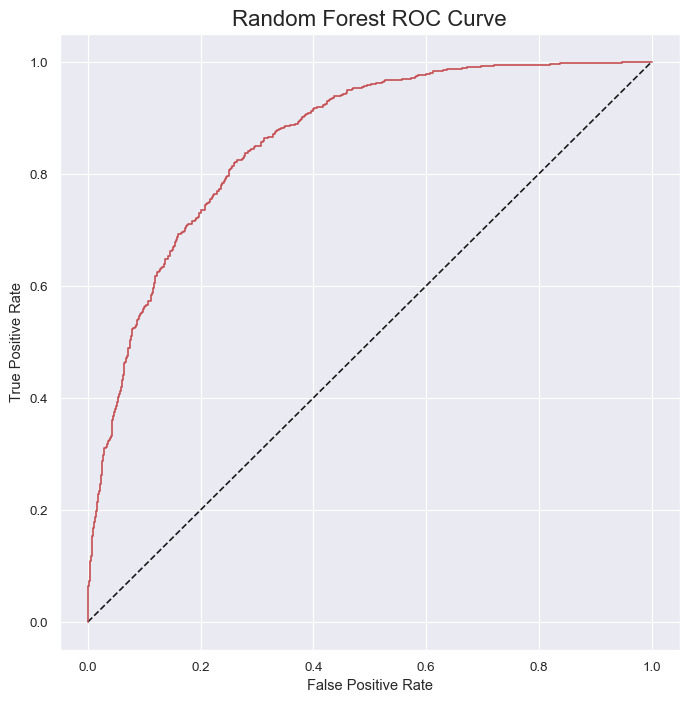

In [138]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

## 34. Logistic Regression

In [139]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8109004739336493


In [140]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.57      0.61       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.81      2110



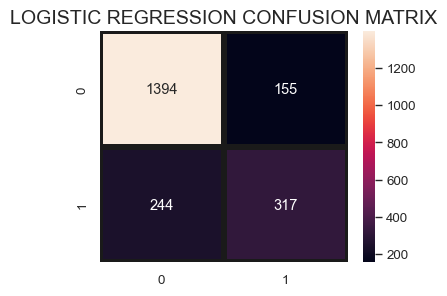

In [141]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

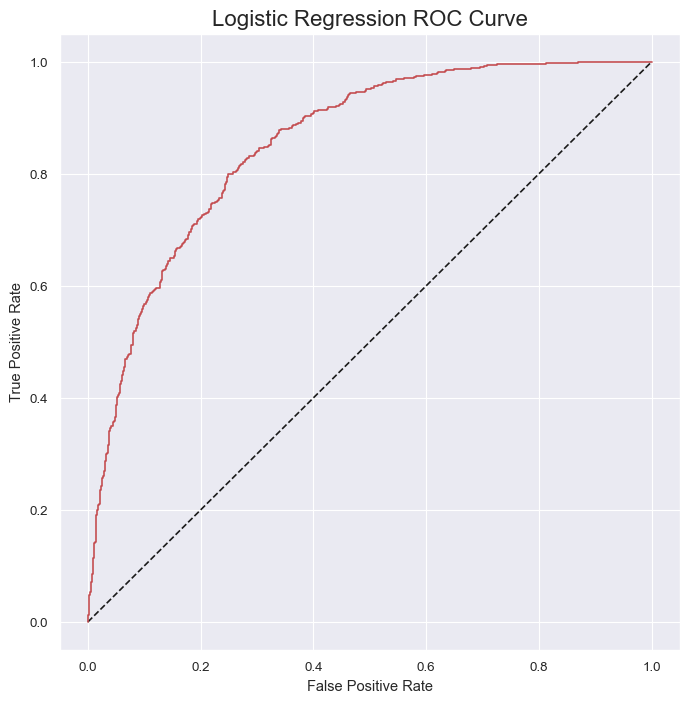

In [142]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

## 35. Decision Tree Classifier

In [143]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.728909952606635


In [144]:
""" Decision tree gives very low score. """

In [145]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1549
           1       0.49      0.54      0.52       561

    accuracy                           0.73      2110
   macro avg       0.66      0.67      0.66      2110
weighted avg       0.74      0.73      0.73      2110



## 36. AdaBoost Classifier

In [146]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.8113744075829384

In [147]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1549
           1       0.68      0.55      0.61       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



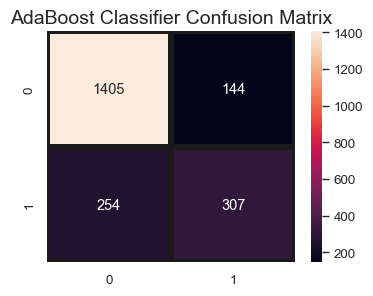

In [148]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

## 37. Gradient Boosting Classifier

In [149]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.804739336492891


In [150]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.66      0.55      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.80      0.80      2110



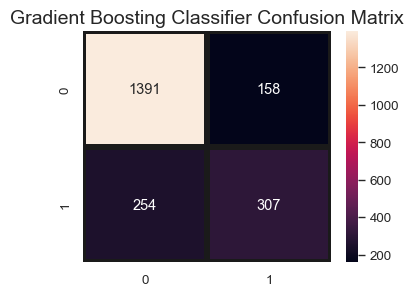

In [151]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

## 38. Voting Classifier

Let's now predict the final model based on the highest majority of voting and check it's score

In [152]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8175355450236966


In [153]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1549
           1       0.69      0.57      0.62       561

    accuracy                           0.82      2110
   macro avg       0.77      0.74      0.75      2110
weighted avg       0.81      0.82      0.81      2110



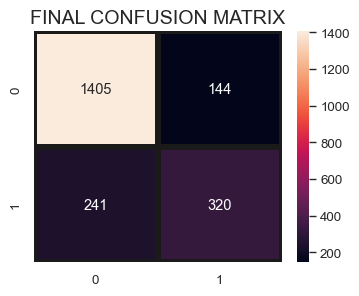

In [154]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

# Conclusion

From the confusion matrix we can see that: There are total 1400+149=1549 actual non-churn values and the algorithm predicts 1400 of them as non churn and 149 of them as churn. While there are 237+324=561 actual churn values and the algorithm predicts 237 of them as non churn values and 324 of them as churn values.

Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn.